In [1]:
#DECISION TREE MODELLING
#CART ALGORITHMS (CLASSIFICATION AND REGRESSION TREES)



In [5]:
#Importing libraries, preprocessing and splitting data 
# library for displaying plots
import matplotlib.pyplot as plt
# display plots in the notebook 
%matplotlib inline

## First, we repeat the load and preprocessing steps

# Load data
from sklearn import datasets
iris = datasets.load_iris()

# Training and test spliting
from sklearn.model_selection import train_test_split

x_iris, y_iris = iris.data, iris.target
# Test set will be the 25% taken randomly
x_train, x_test, y_train, y_test = train_test_split(x_iris, y_iris, test_size=0.25, random_state=33)

#Preprocessing:Normalize
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [9]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

from sklearn import tree

max_depth = 3
random_state=1

#Create decision tree model
model = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)

#Train the model using training sets
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [10]:
print("Prediction ", model.predict(x_train))
print("Expected ", y_train)

Prediction  [1 0 1 1 1 0 0 1 0 2 0 0 1 2 0 1 2 2 1 1 0 0 2 0 0 2 1 1 2 2 2 2 0 0 1 1 0
 1 2 1 2 0 2 0 1 0 2 1 0 2 2 0 0 2 0 0 0 2 2 0 1 0 1 0 1 1 1 1 1 0 1 0 1 2
 0 0 0 0 2 2 0 1 1 2 1 0 0 2 1 1 0 1 1 0 2 1 2 1 2 0 1 0 0 0 2 1 2 1 2 1 2
 0]
Expected  [1 0 1 1 1 0 0 1 0 2 0 0 1 2 0 1 2 2 1 1 0 0 2 0 0 2 1 1 2 2 2 2 0 0 1 1 0
 1 2 1 2 0 2 0 1 0 2 1 0 2 2 0 0 2 0 0 0 2 2 0 1 0 1 0 1 1 1 1 1 0 1 0 1 2
 0 0 0 0 2 2 0 1 1 2 1 0 0 1 1 1 0 1 1 0 2 2 2 1 2 0 1 0 0 0 2 1 2 1 2 1 2
 0]


In [11]:
print("Predicted probabilities", model.predict_proba(x_train[:10]))

Predicted probabilities [[0.         0.97368421 0.02631579]
 [1.         0.         0.        ]
 [0.         0.97368421 0.02631579]
 [0.         0.97368421 0.02631579]
 [0.         0.97368421 0.02631579]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.97368421 0.02631579]
 [1.         0.         0.        ]
 [0.         0.         1.        ]]


In [16]:
from sklearn import metrics
y_train_pred = model.predict(x_train)
print("Accuracy in training:", metrics.accuracy_score(y_train, y_train_pred))
# Now we evaluate error in testing
y_test_pred = model.predict(x_test)
print("Accuracy in testing ", metrics.accuracy_score(y_test, y_test_pred))

Accuracy in training: 0.9821428571428571
Accuracy in testing  0.9210526315789473


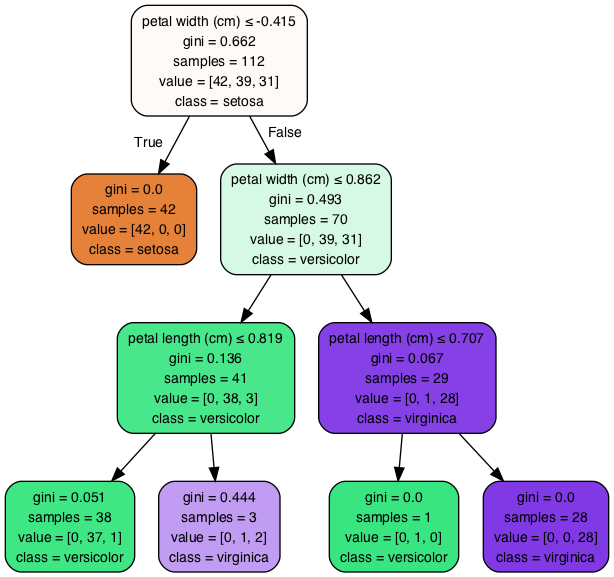

In [17]:
from IPython.display import Image 
from sklearn.externals.six import StringIO
import pydotplus as pydot

dot_data = StringIO()  
tree.export_graphviz(model, out_file=dot_data,  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  


graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('iris-tree.png')
Image(graph.create_png())  

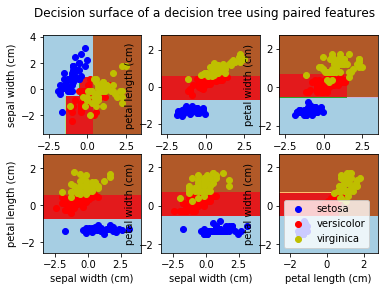

In [18]:
%run util_ds.py

#Display plots
%matplotlib inline
plot_tree_iris()

In [19]:
# For evaluating algotithm
print(metrics.classification_report(y_test, y_test_pred,target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       0.79      1.00      0.88        11
  virginica       1.00      0.84      0.91        19

avg / total       0.94      0.92      0.92        38

